In [1]:
from utils_Sep import *
import CONFIG as C
# test02101804

In [2]:
# 把服务器上复制过来的转化为list
target_str = '0G,1INCH,2Z,A,AAVE,ACE,ACH,ACT,ADA,AERO,AEVO,AGLD,AIXBT,ALGO,ALLO,ANIME,APE,API3,APR,APT,AR,ARB,ARKM,ASTER,AT,ATH,ATOM,AUCTION,AVAX,AVNT,AXS,BABY,BAND,BARD,BAT,BCH,BEAT,BERA,BICO,BIGTIME,BIO,BLUAI,BLUR,BNB,BOME,BRETT,BTC,CATI,CC,CELO,CETUS,CFX,CHZ,COAI,COMP,COOKIE,CRV,CVX,DASH,DEGEN,DOGE,DOOD,DOT,DYDX,EDEN,EGLD,EIGEN,ENA,ENJ,ENS,ENSO,ETC,ETH,ETHFI,ETHW,F,FARTCOIN,FIL,FLOW,FXS,GALA,GAS,GIGGLE,GLM,GMT,GMX,GPS,GRASS,GRT,H,HBAR,HMSTR,HOME,HUMA,HYPE,ICP,ICX,IMX,INIT,INJ,IOST,IOTA,IP,JCT,JELLYJELLY,JTO,JUP,KAITO,KGEN,KMNO,KSM,LA,LAB,LAYER,LDO,LIGHT,LINEA,LINK,LPT,LQTY,LRC,LTC,MAGIC,MANA,MASK,ME,MEME,MERL,MET,METIS,MEW,MINA,MMT,MON,MOODENG,MORPHO,MOVE,MUBARAK,NEAR,NEIRO,NEO,NIGHT,NMR,NOT,OL,OM,ONDO,ONE,ONT,OP,ORDER,ORDI,PARTI,PENDLE,PENGU,PEOPLE,PIEVERSE,PIPPIN,PLUME,PNUT,POL,POPCAT,PROMPT,PROVE,PUMP,PYTH,QTUM,RAVE,RECALL,RENDER,RESOLV,RLS,RSR,RVN,S,SAHARA,SAND,SAPIEN,SEI,SENT,SHELL,SIGN,SKY,SNX,SOL,SOLV,SOON,SOPH,SPK,SPX,SSV,STABLE,STRK,STX,SUI,SUSHI,SYRUP,TAO,THETA,TIA,TON,TRB,TREE,TRUMP,TRUST,TRUTH,TRX,TURBO,TURTLE,UMA,UNI,USELESS,VANA,VIRTUAL,W,WAL,WCT,WET,WIF,WLD,WLFI,WOO,XAN,XLM,XPL,XRP,XTZ,YB,YFI,YGG,ZBT,ZEC,ZEN,ZETA,ZIL,ZK,ZORA,ZRO,ZRX'
target_list = target_str.split(',')
print(str(target_list))

['0G', '1INCH', '2Z', 'A', 'AAVE', 'ACE', 'ACH', 'ACT', 'ADA', 'AERO', 'AEVO', 'AGLD', 'AIXBT', 'ALGO', 'ALLO', 'ANIME', 'APE', 'API3', 'APR', 'APT', 'AR', 'ARB', 'ARKM', 'ASTER', 'AT', 'ATH', 'ATOM', 'AUCTION', 'AVAX', 'AVNT', 'AXS', 'BABY', 'BAND', 'BARD', 'BAT', 'BCH', 'BEAT', 'BERA', 'BICO', 'BIGTIME', 'BIO', 'BLUAI', 'BLUR', 'BNB', 'BOME', 'BRETT', 'BTC', 'CATI', 'CC', 'CELO', 'CETUS', 'CFX', 'CHZ', 'COAI', 'COMP', 'COOKIE', 'CRV', 'CVX', 'DASH', 'DEGEN', 'DOGE', 'DOOD', 'DOT', 'DYDX', 'EDEN', 'EGLD', 'EIGEN', 'ENA', 'ENJ', 'ENS', 'ENSO', 'ETC', 'ETH', 'ETHFI', 'ETHW', 'F', 'FARTCOIN', 'FIL', 'FLOW', 'FXS', 'GALA', 'GAS', 'GIGGLE', 'GLM', 'GMT', 'GMX', 'GPS', 'GRASS', 'GRT', 'H', 'HBAR', 'HMSTR', 'HOME', 'HUMA', 'HYPE', 'ICP', 'ICX', 'IMX', 'INIT', 'INJ', 'IOST', 'IOTA', 'IP', 'JCT', 'JELLYJELLY', 'JTO', 'JUP', 'KAITO', 'KGEN', 'KMNO', 'KSM', 'LA', 'LAB', 'LAYER', 'LDO', 'LIGHT', 'LINEA', 'LINK', 'LPT', 'LQTY', 'LRC', 'LTC', 'MAGIC', 'MANA', 'MASK', 'ME', 'MEME', 'MERL', 'MET', 'M

# 全市场分析

In [4]:
results = []
symbol_list = target_list
symbol_list = ['CYS','DASH','JELLYJELLY','JASMY','ASTR','XMR','MAGMA','AVNT','RENDER','BLUR','IMX','COMP','SYRUP','BB','AXS']
symbol_list = ['ENA']
last_time = C.last_time_cf
lookback_window = 1
import time

for symbol in symbol_list:
    try:
        temp_time1 = time.time()
        result = analyze_funding_rate_diff_v2(symbol, last_time, lookback_window, isPlotPlotly=False,isPlotMatplotlib=False)
        results.append({
            'symbol': result['symbol'],
            'latest_cumulative_diff': result['latest_cumulative_diff'],
            'earn': result['earn'],
            'earn_1day': result['earn_1day'],
            'earn_mean': result['earn_mean'],
            'mode_binary_prop': result['mode_binary_prop'],
            'mode_sign_binary': result['mode_sign_binary'],
            'do_indicator': result['do_indicator'],
            'funding_interval_bn': result['funding_interval_bn'],
            'funding_interval_okx': result['funding_interval_okx']
        })
        temp_time2 = time.time()
        print(f"Processed {symbol} in {temp_time2 - temp_time1:.2f} seconds.")
    except Exception as e:
        print(f"Error processing {symbol}: {e}")
        continue

# 将结果转换为DataFrame并显示
results_df = pd.DataFrame(results)
results_df['abs_latest_cumulative_diff'] = results_df['latest_cumulative_diff'].abs()
black_list = ['ZEREBRO', 'WAXP', 'NEIROETH', 'ALCH', 'GMT', 'GRT', 'PENGU', 'HUMA', 'ORDI', 'DEGEN', 'MKR', 'SSV', 'BLUR', 'CTC', 'LPT', 'CHZ', 'XAUT', 'PROMPT', 'CSPR', 'TRB', 'RENDER', 'AEVO', 'ARB', 'ACT', 'KMNO', 'ATOM', 'CETUS', 'WIF', 'BIGTIME', 'SNX', 'BABY', 'AUCTION', 'RAY', 'BONK','NEO', 'LRC', 'ZK', 'COMP', 'AAVE', 'THETA', 'LTC', 'OP', 'ENS', 'TRX', 'STX', 'AR', 'APT', 'CFX', 'XRP', 'BTC', 'UNI', 'ARKM', 'SHIB', 'ADA', 'DOT', 'EIGEN','ETH', 'DOGE', 'SOL'] + ['DOGE','TON','ONDO','AAVE','TRX','BNB','ADA','SUI','LINK','LTC','APT','UNI', 'RENDER','VIRTUAL','PNUT', 'INITUSDT', 'JUPUSDT']
black_list = []
results_df_temp = results_df.copy()
results_df_temp['abs_latest_cumulative_diff'] = results_df_temp['latest_cumulative_diff'].abs()
results_df_temp = results_df_temp[results_df_temp['funding_interval_bn']==results_df_temp['funding_interval_okx']]
results_df_temp[~results_df_temp.symbol.isin(black_list)].sort_values(by='abs_latest_cumulative_diff', ascending=False).head(40)

[ENA] read_data=0.843s rest=0.007s 
Processed ENA in 0.85 seconds.


,symbol,latest_cumulative_diff,earn,earn_1day,earn_mean,mode_binary_prop,mode_sign_binary,do_indicator,funding_interval_bn,funding_interval_okx,abs_latest_cumulative_diff
0,ENA,0.000121,0.000121,0.000121,0.000145,0.833333,1,False,4,4,0.000121


# 单个币对分析

[VVV] read_data=0.926s rest=0.012s 
[Matplotlib] ℹ️  未提供特征文件路径，跳过流动性信息展示


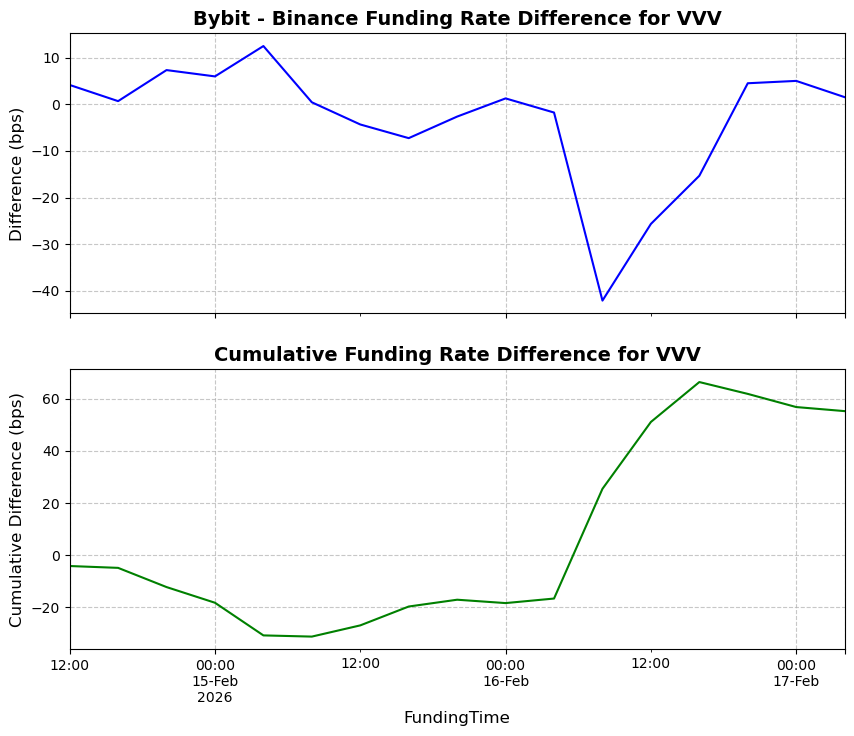

In [3]:
results = analyze_funding_rate_diff_v2(symbol='VVV', last_time=pd.to_datetime('2026-02-17 08:15:00'), lookback_window=3, isPlotMatplotlib=True, features_csv_path ='',mode = 'BN-BYBIT' )

In [ ]:
results['funding_diff']

,FundingRate_binance,FundingRate_okx,funding_diff
FundingTime,,,
2026-01-30 00:00:00,-0.000133,-0.000261,-0.000128
2026-01-30 04:00:00,-0.000033,-0.000204,-0.000171
2026-01-30 08:00:00,-0.000078,-0.000037,0.000041
2026-01-30 12:00:00,0.000050,0.000050,0.000000
2026-01-30 16:00:00,0.000050,0.000050,0.000000
2026-01-30 20:00:00,0.000048,0.000050,0.000002
2026-01-31 00:00:00,0.000005,0.000050,0.000045
2026-01-31 04:00:00,0.000030,0.000050,0.000020
2026-01-31 08:00:00,0.000050,0.000050,0.000000


: 

In [ ]:
['USELESS','NAORIS','EPT','AVAAI','ZEREBRO','IOSDT','SAPIEN','ICNT','ZRO','GLM','ENJ','LA','KAITO','POLYX','BAN','MAGIC','LPT','MOVE','ORCA']  

[ORDER] read_data=0.553s rest=0.007s 
[Matplotlib] ✅ 成功读取 ORDER 的流动性特征信息


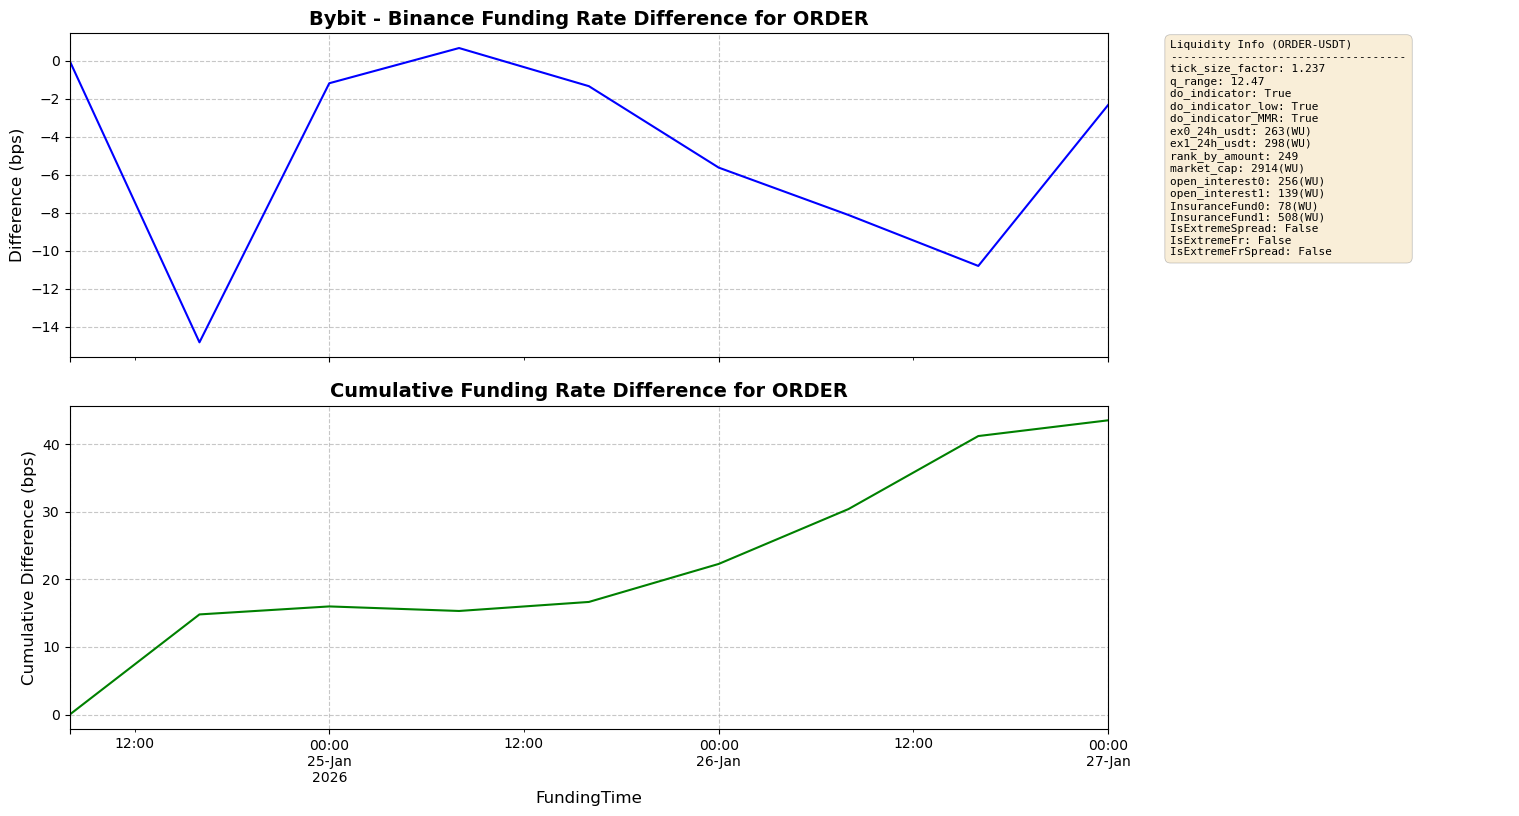

[JTO] read_data=0.888s rest=0.005s 
[Matplotlib] ✅ 成功读取 JTO 的流动性特征信息


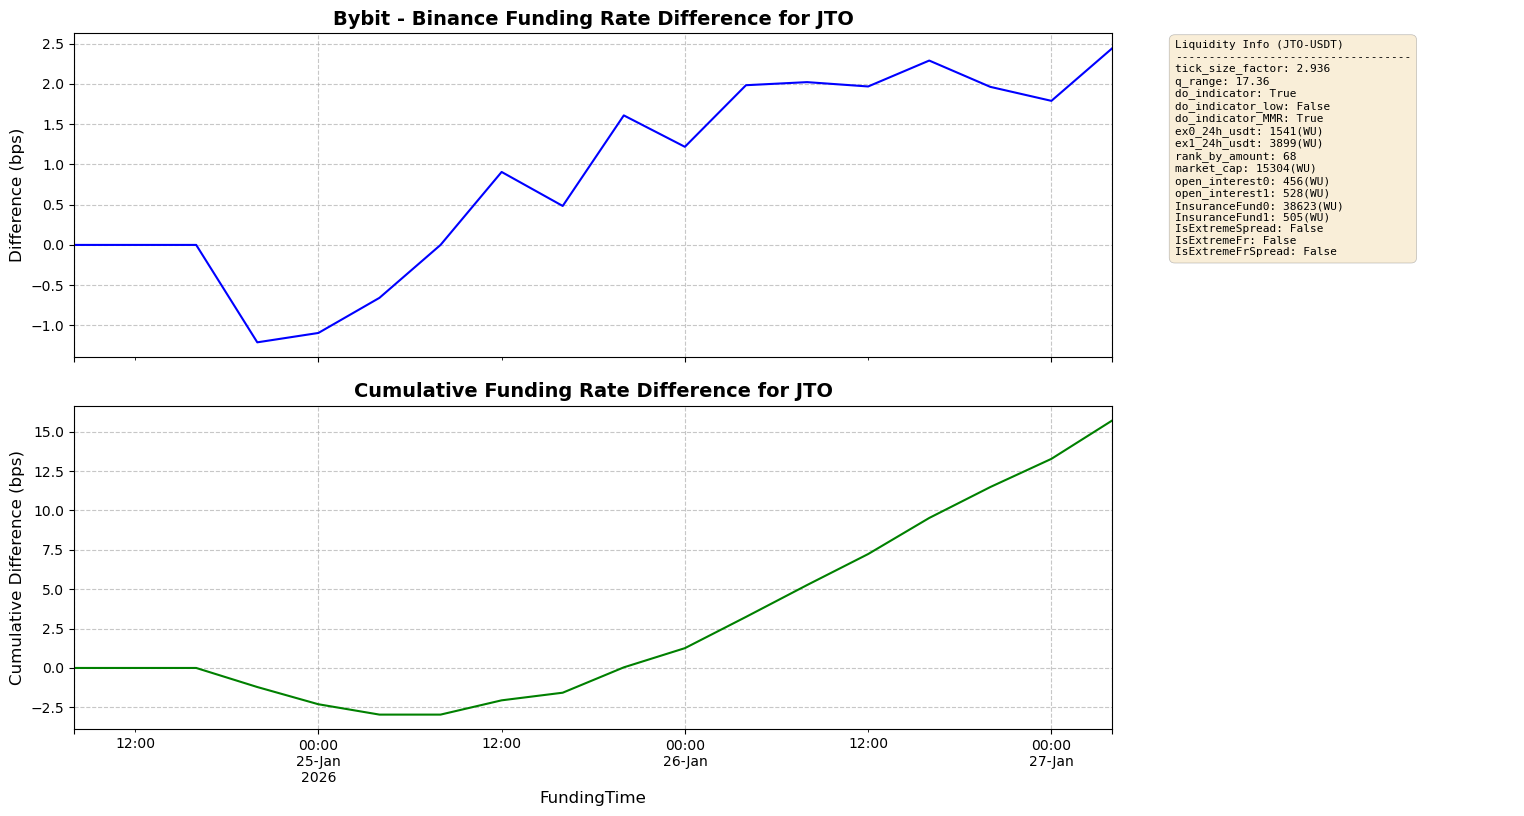

[ID] read_data=0.924s rest=0.006s 
[Matplotlib] ✅ 成功读取 ID 的流动性特征信息


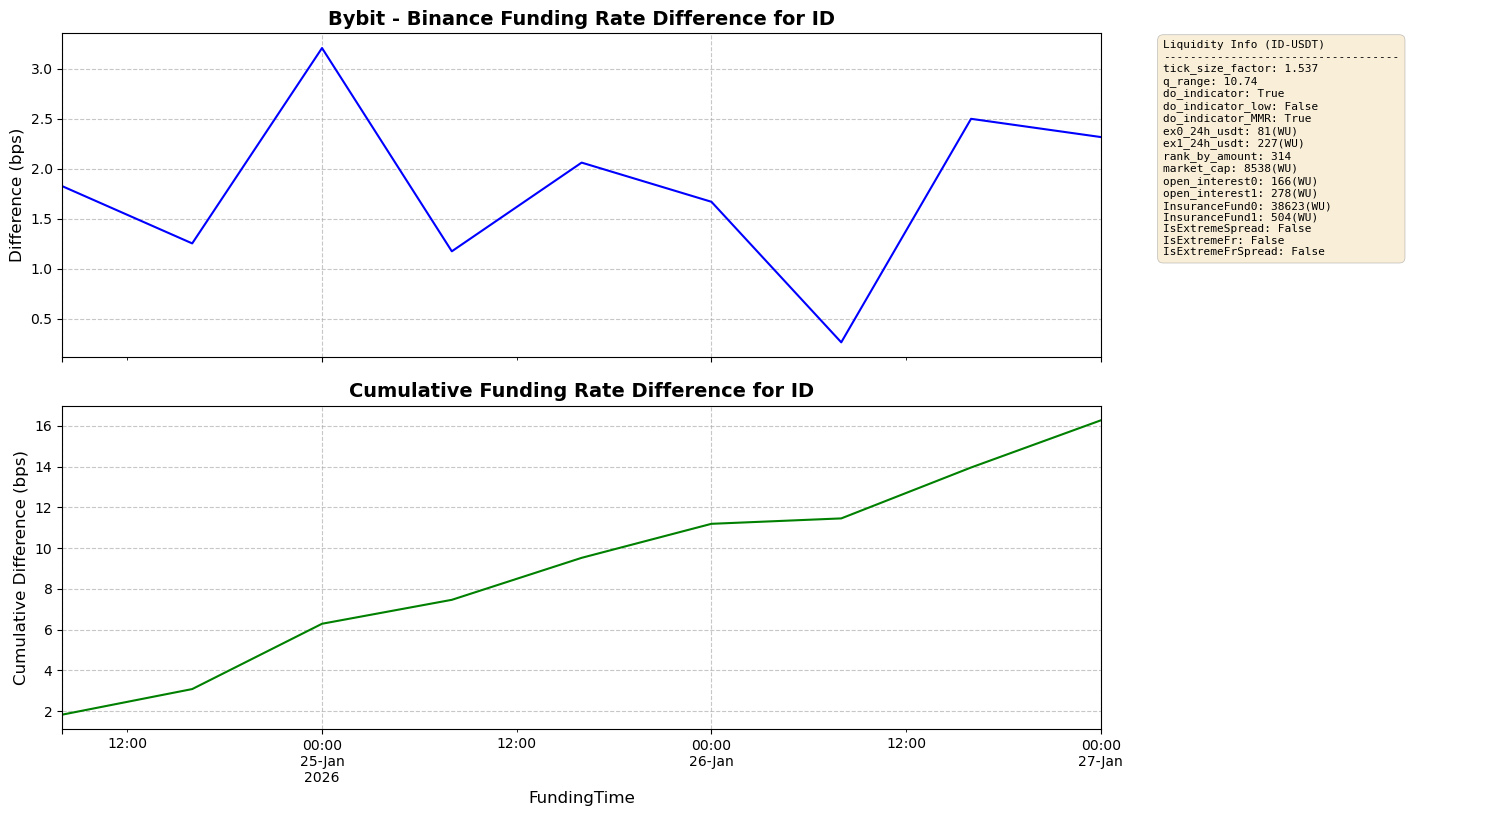

[TWT] read_data=0.875s rest=0.006s 
[Matplotlib] ✅ 成功读取 TWT 的流动性特征信息


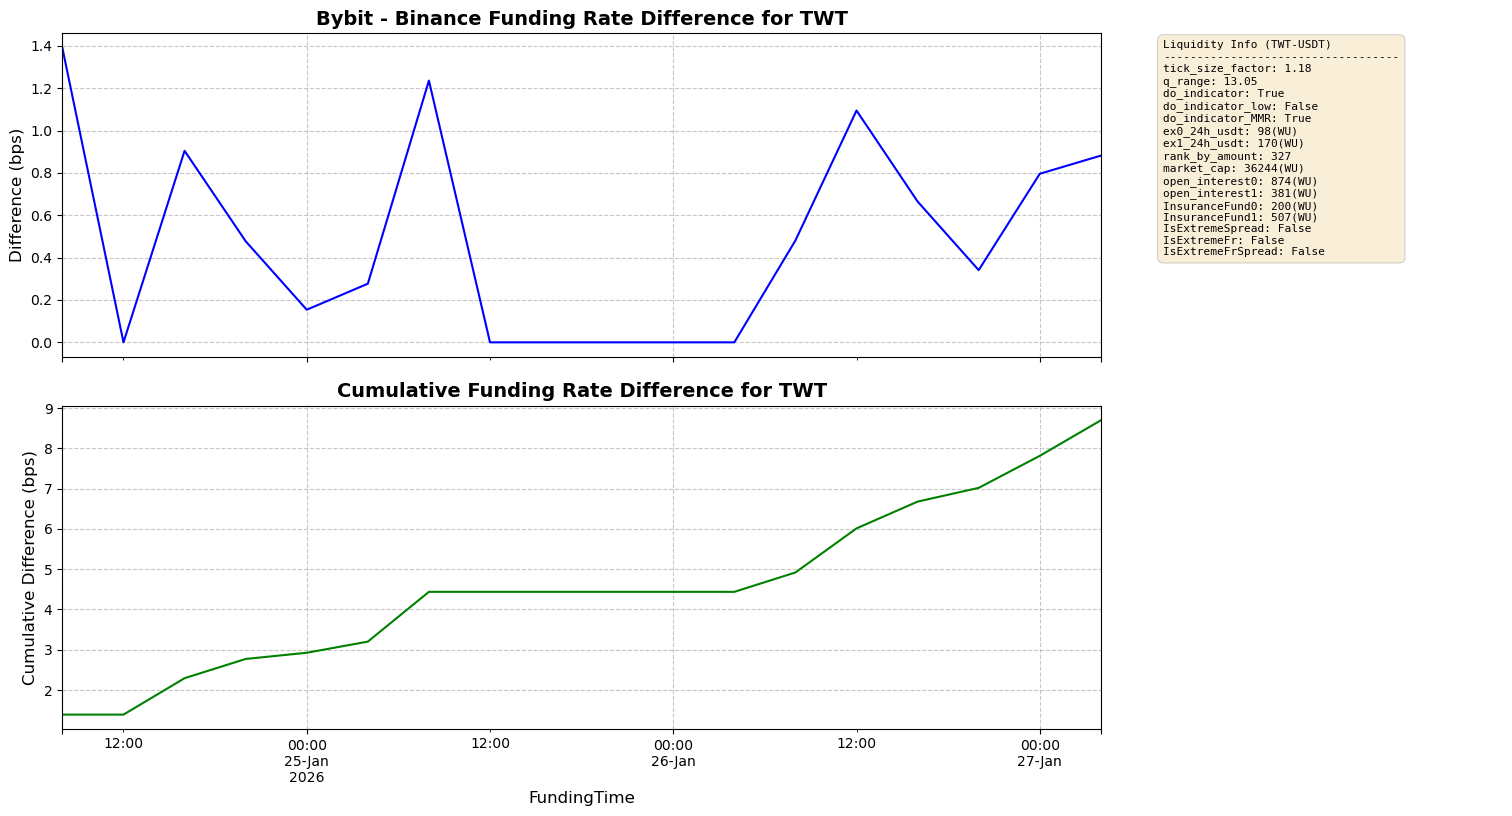

[BIGTIME] read_data=0.891s rest=0.006s 
[Matplotlib] ✅ 成功读取 BIGTIME 的流动性特征信息


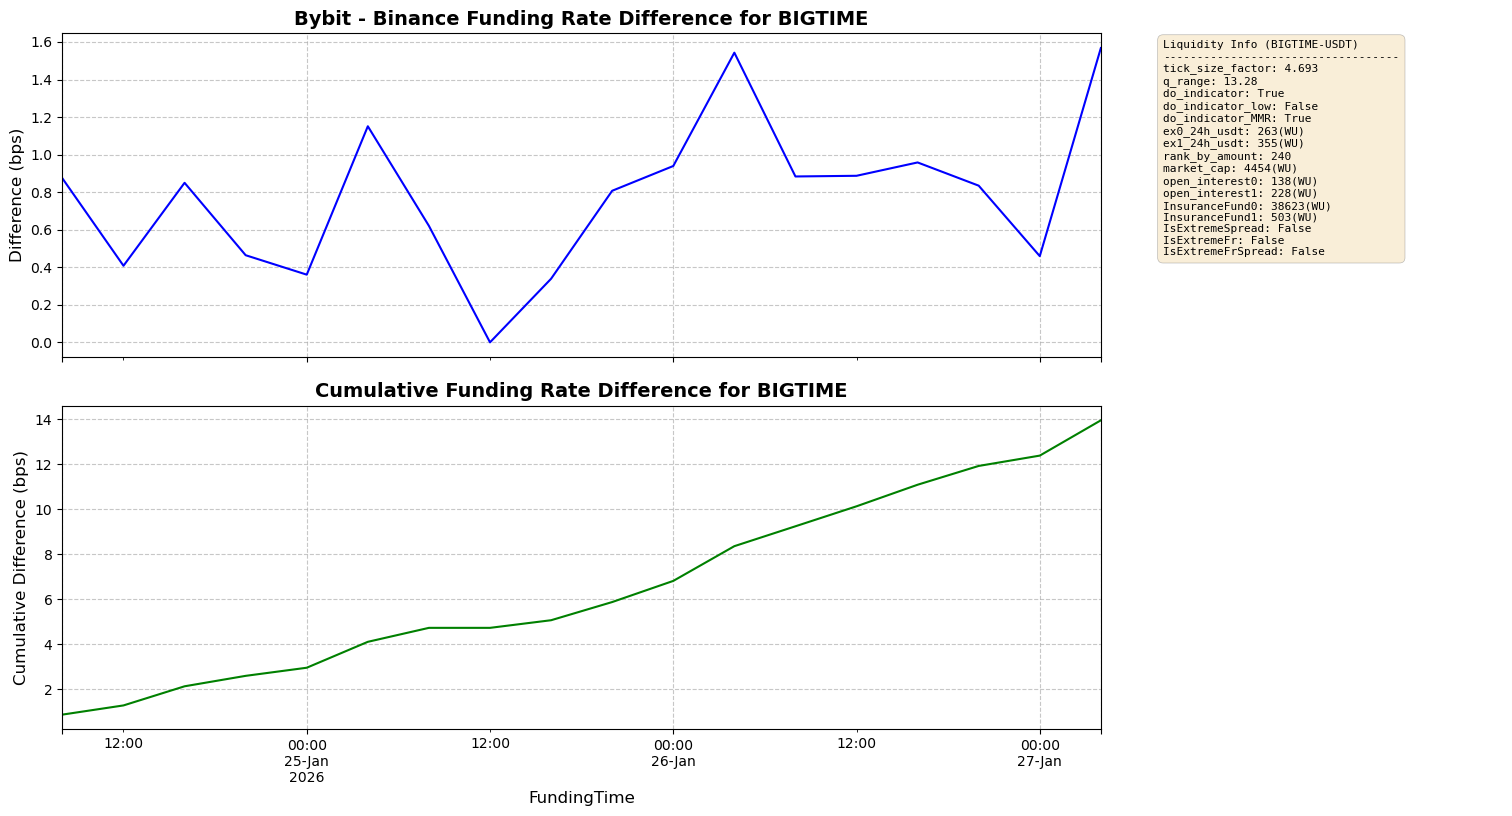

[ASTR] read_data=0.915s rest=0.006s 
[Matplotlib] ✅ 成功读取 ASTR 的流动性特征信息


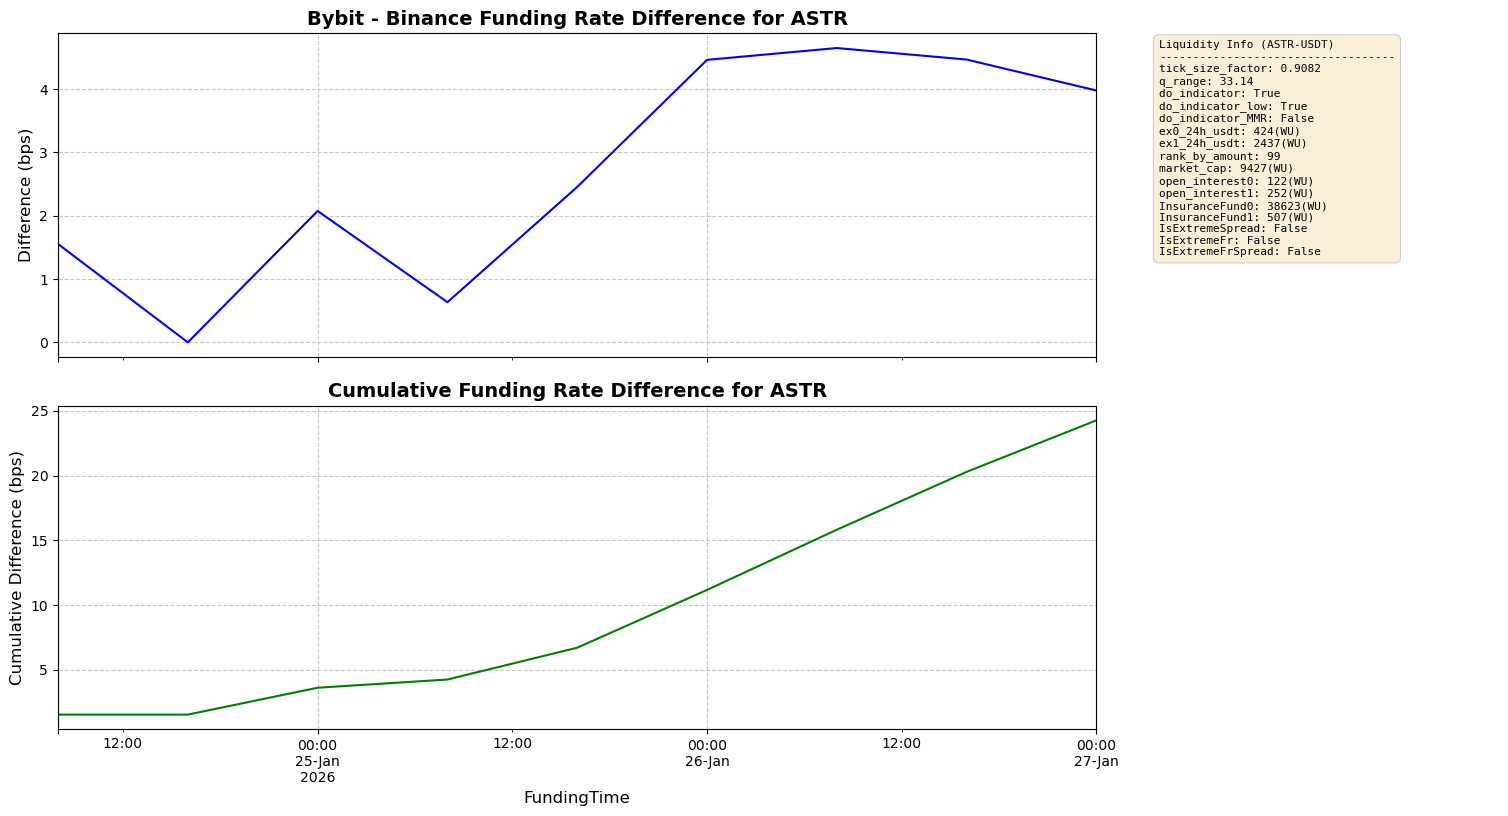

[ROSE] read_data=1.015s rest=0.007s 
[Matplotlib] ✅ 成功读取 ROSE 的流动性特征信息


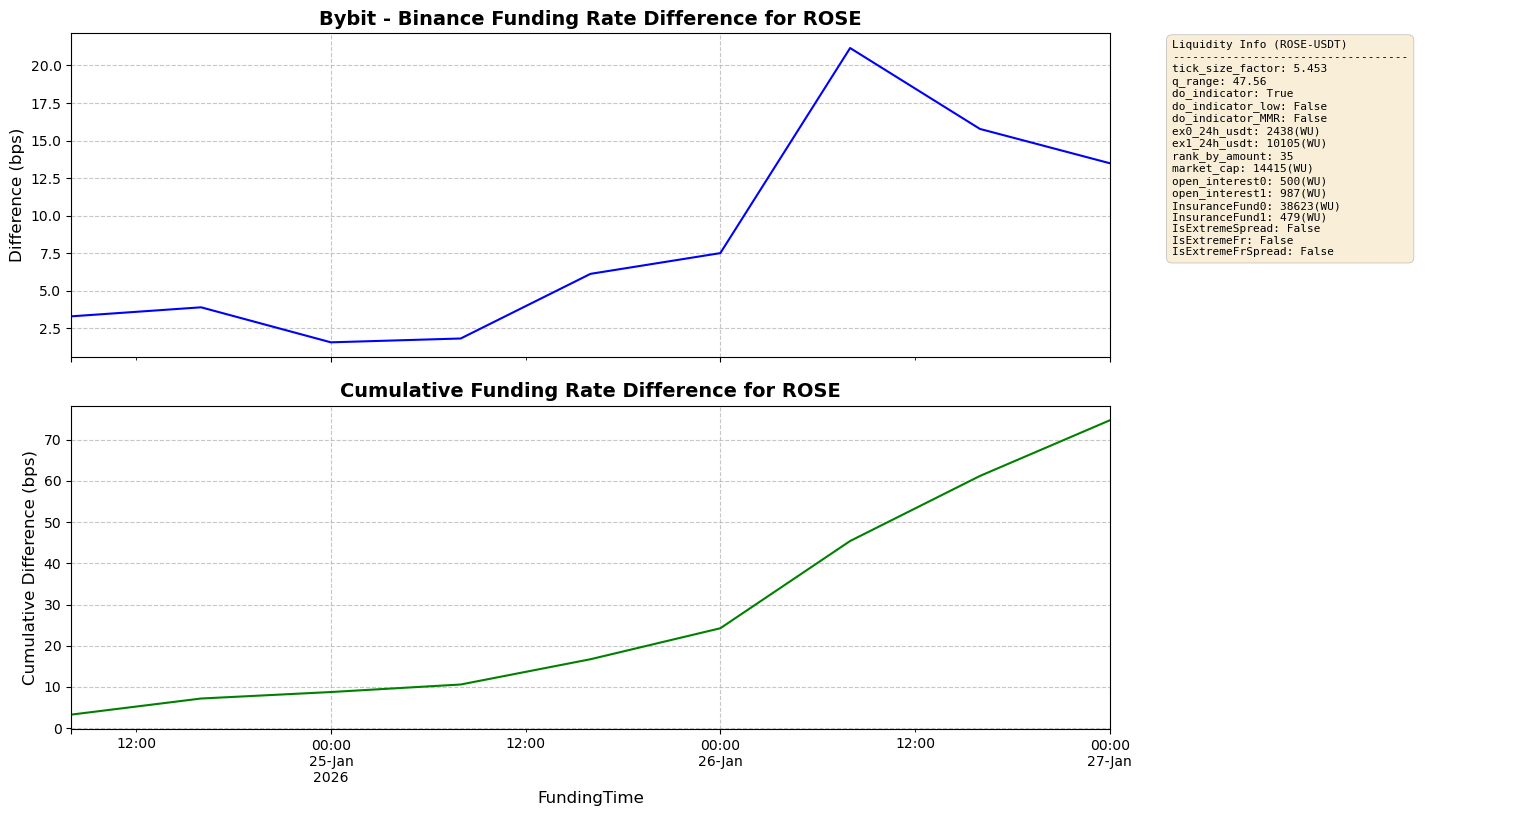

[SYRUP] read_data=0.758s rest=0.005s 
[Matplotlib] ✅ 成功读取 SYRUP 的流动性特征信息


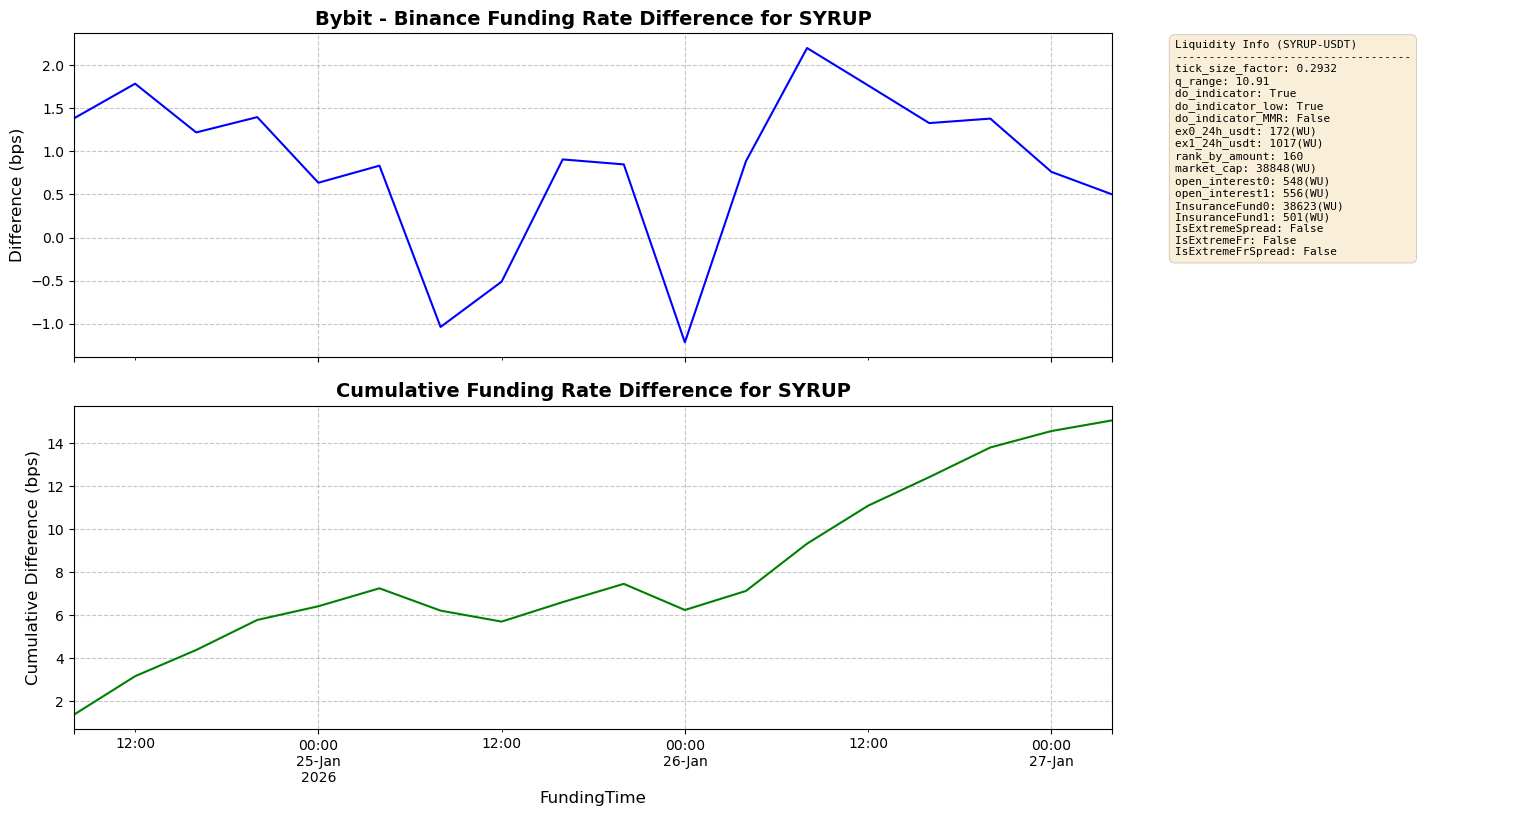

[STG] read_data=0.956s rest=0.007s 
[Matplotlib] ✅ 成功读取 STG 的流动性特征信息


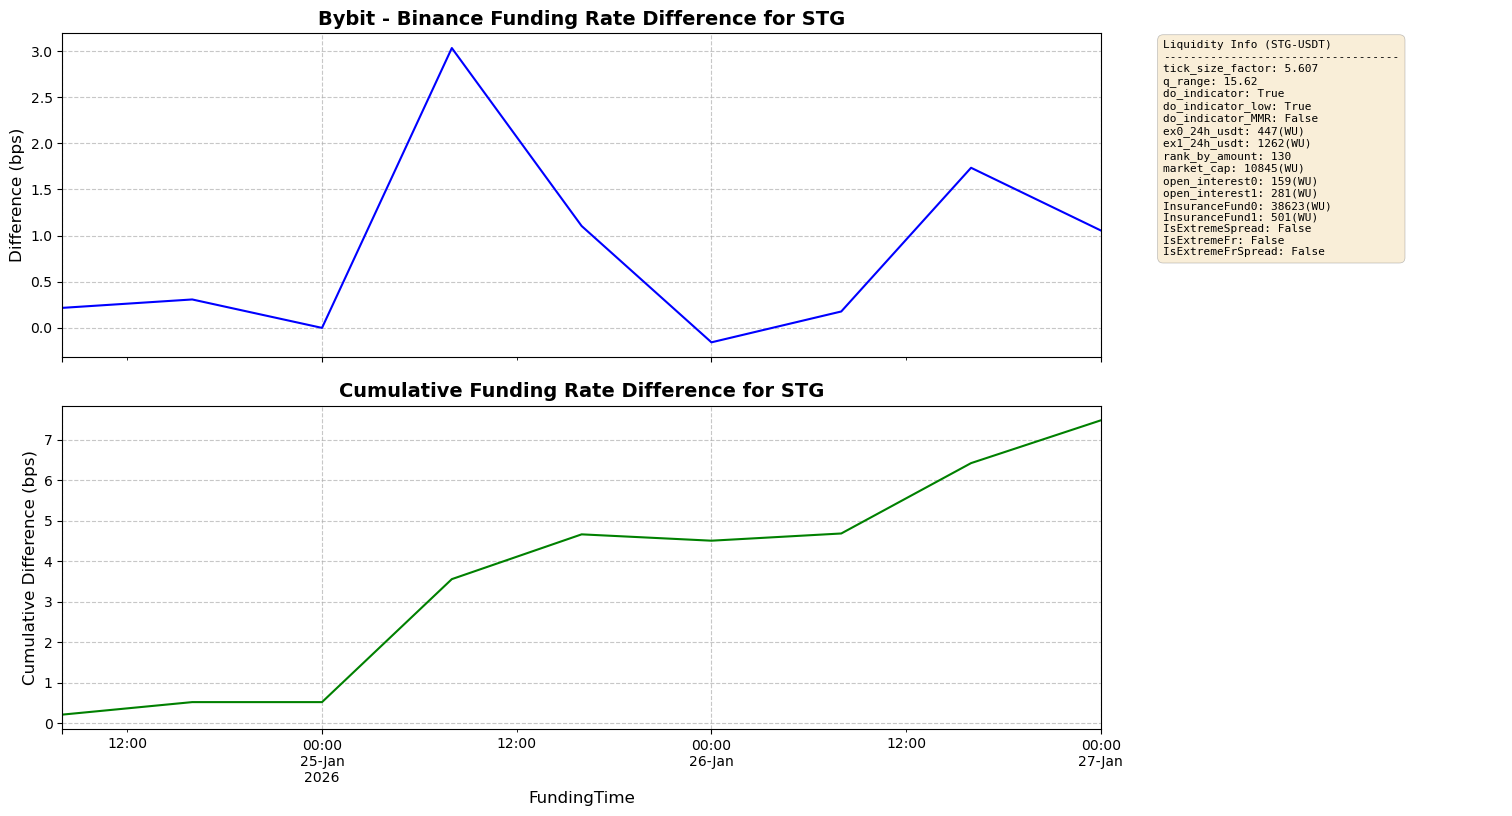

[BAT] read_data=0.919s rest=0.007s 
[Matplotlib] ✅ 成功读取 BAT 的流动性特征信息


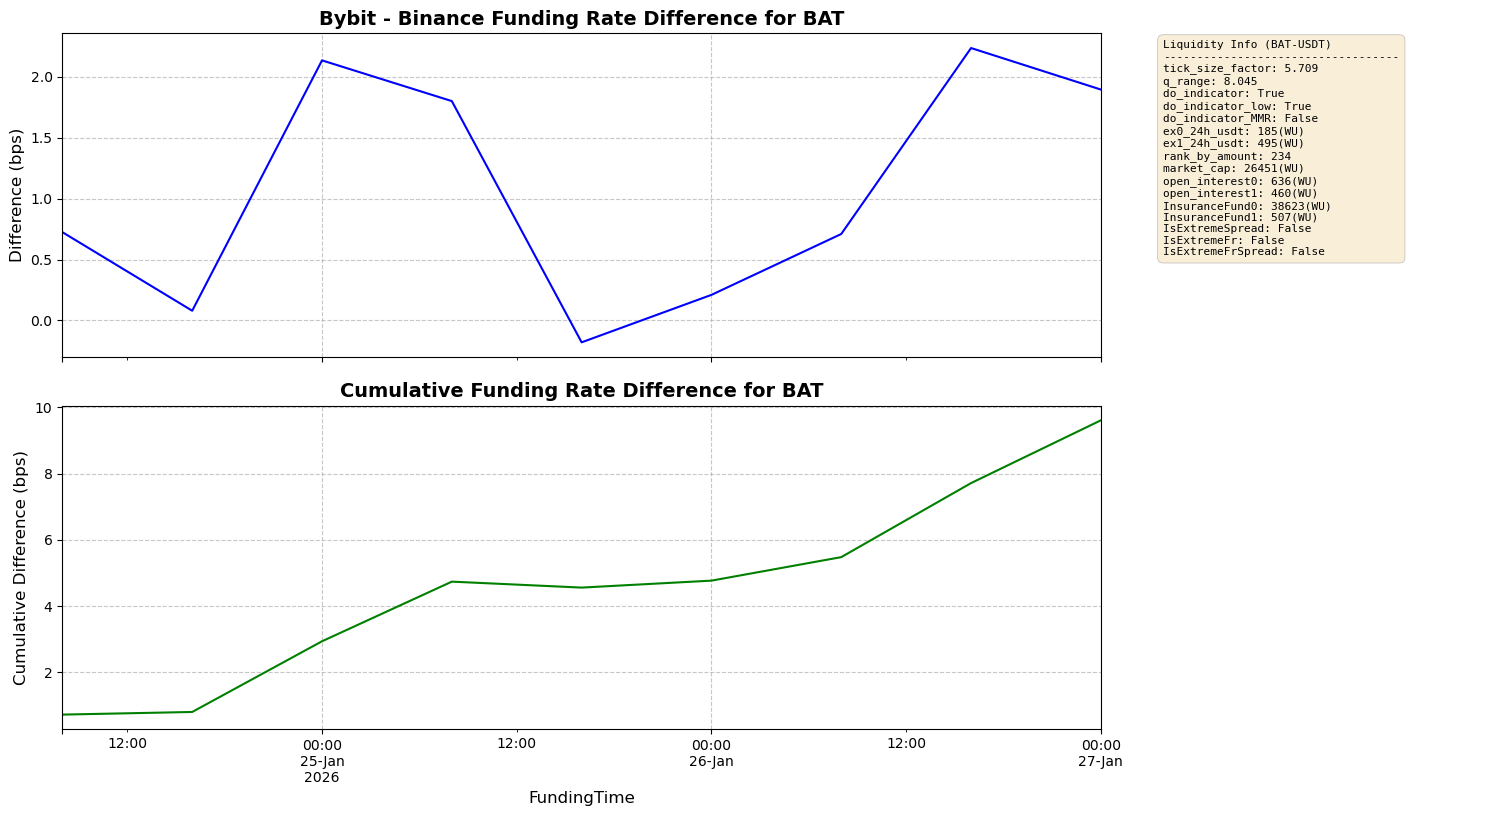

[POL] read_data=0.885s rest=0.006s 
[Matplotlib] ✅ 成功读取 POL 的流动性特征信息


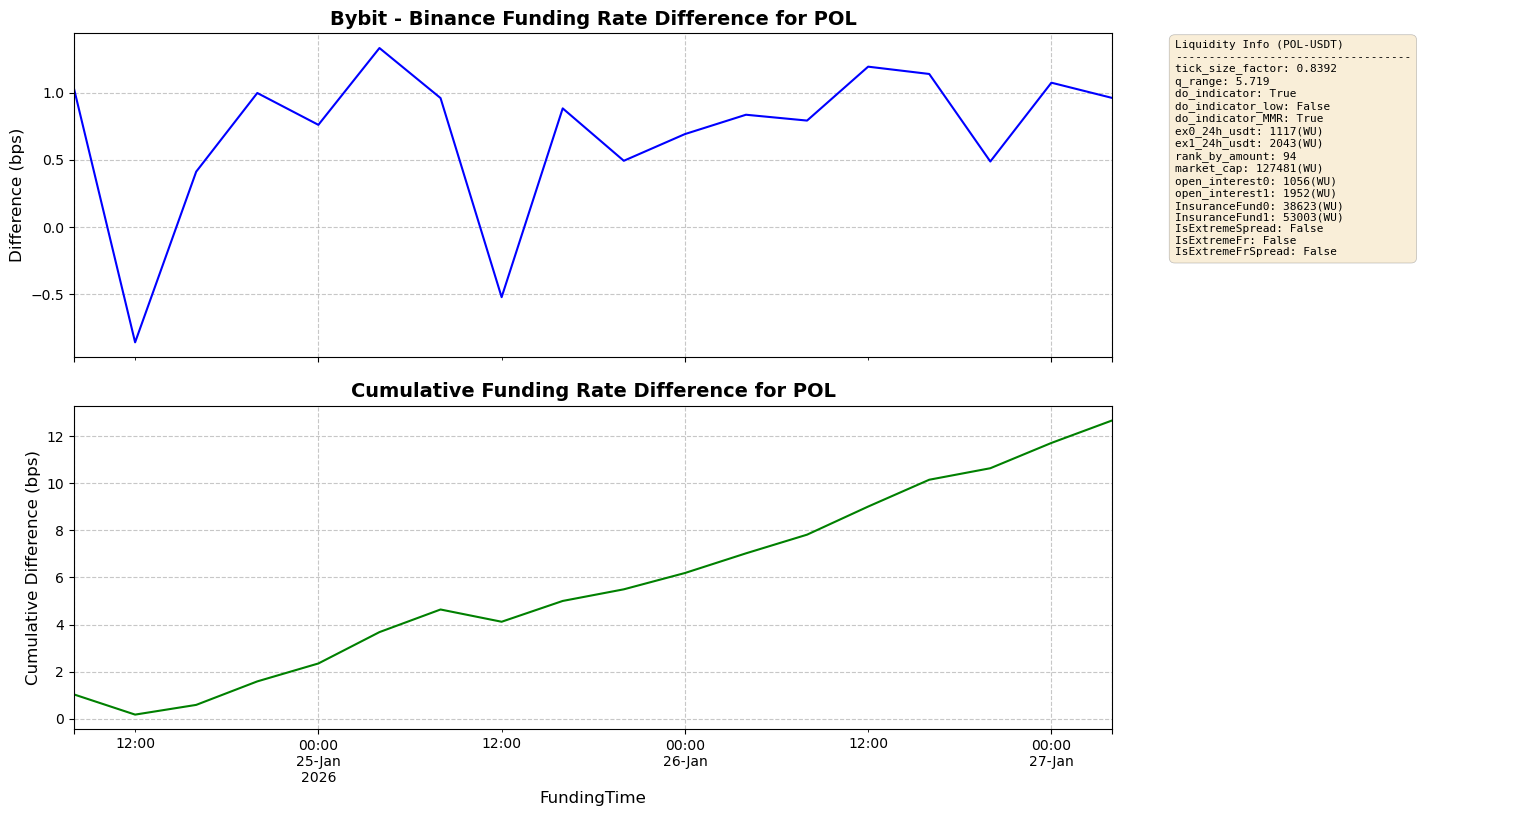

[LYN] read_data=0.400s rest=0.004s 
[Matplotlib] ✅ 成功读取 LYN 的流动性特征信息


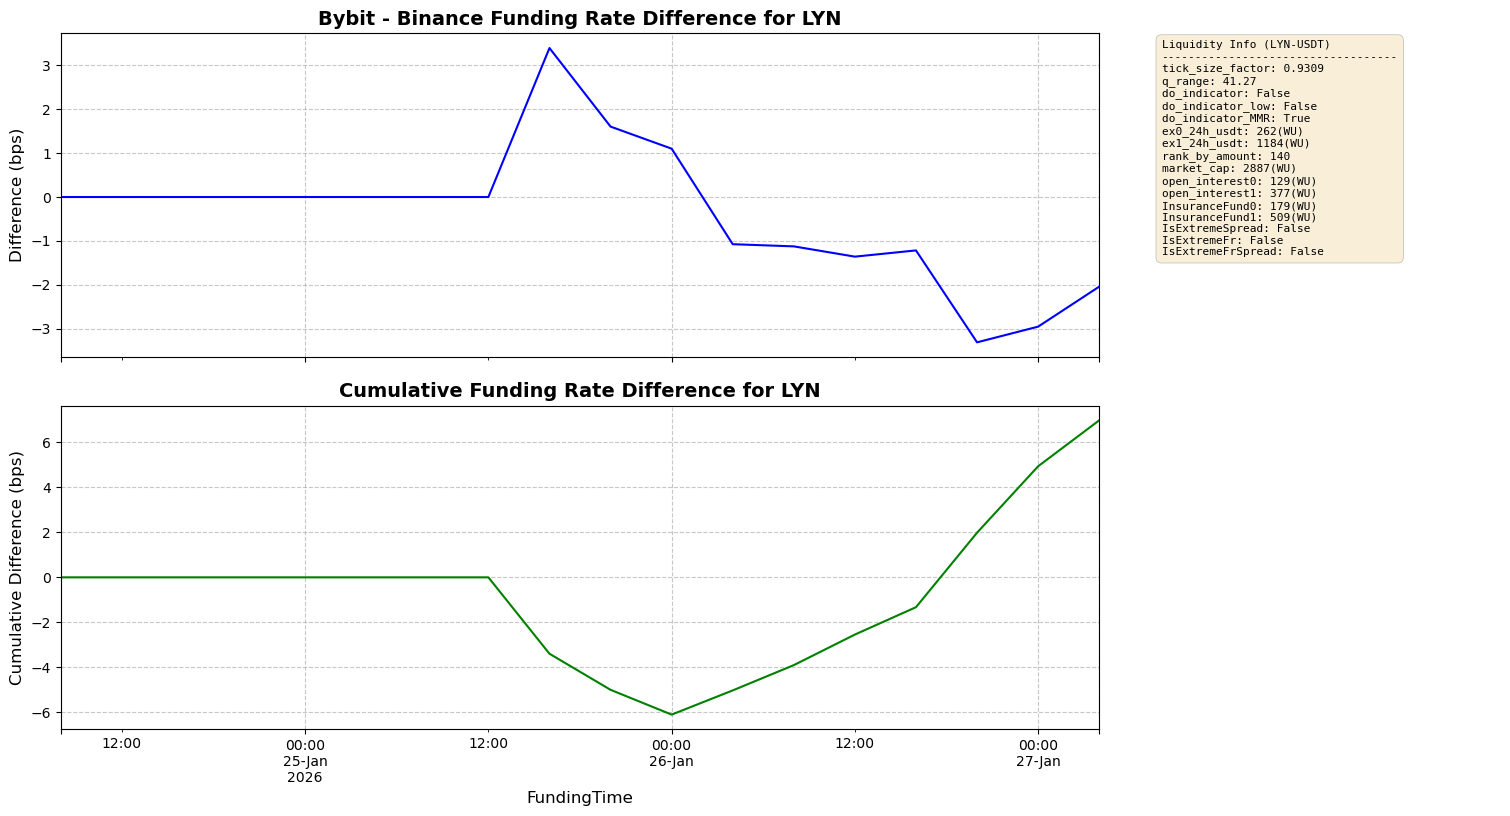

[S] read_data=0.856s rest=0.006s 
[Matplotlib] ✅ 成功读取 S 的流动性特征信息


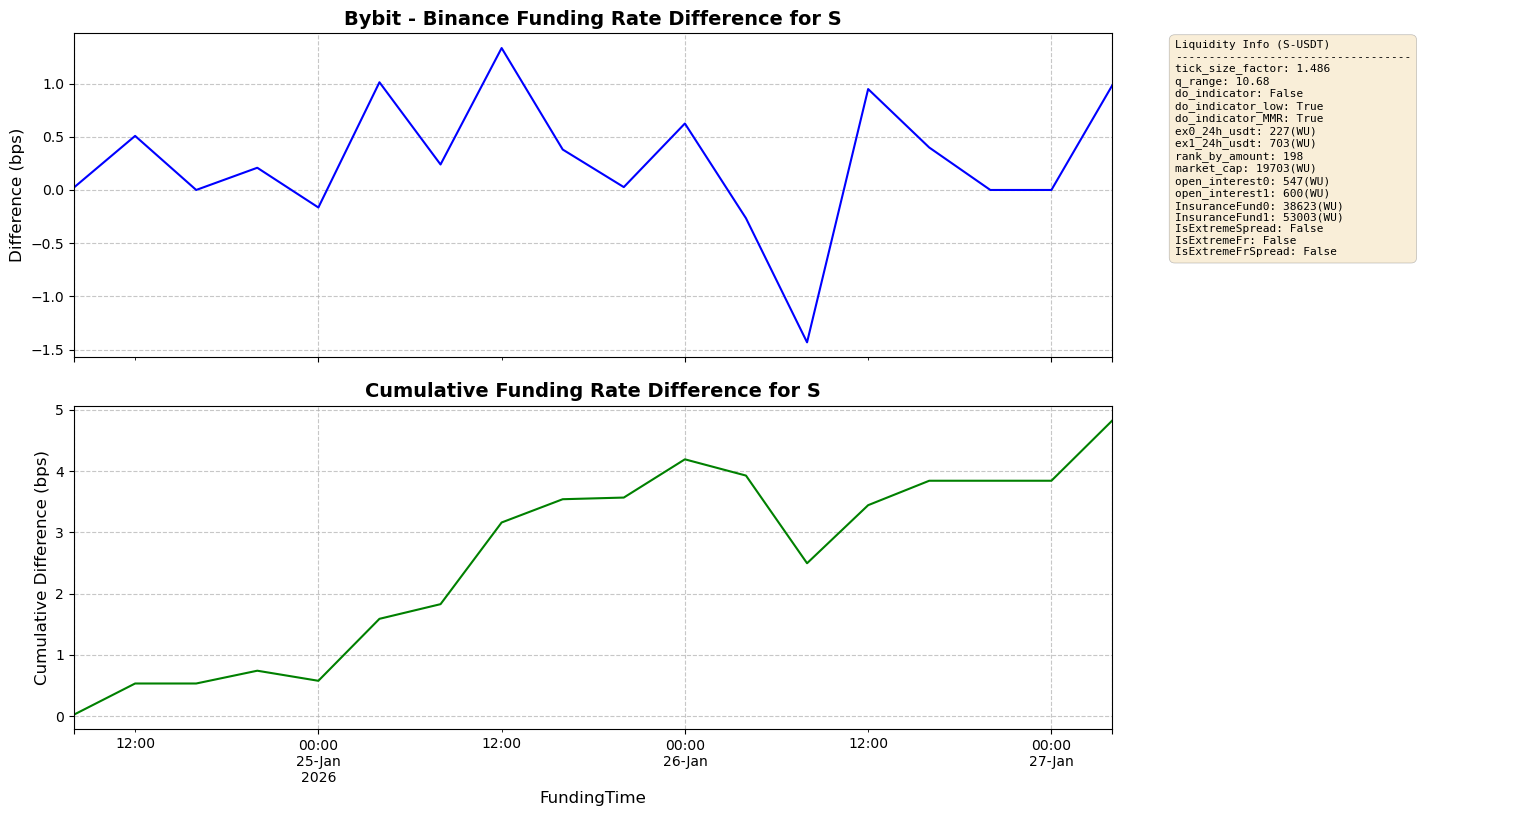

[B2] read_data=0.809s rest=0.006s 
[Matplotlib] ✅ 成功读取 B2 的流动性特征信息


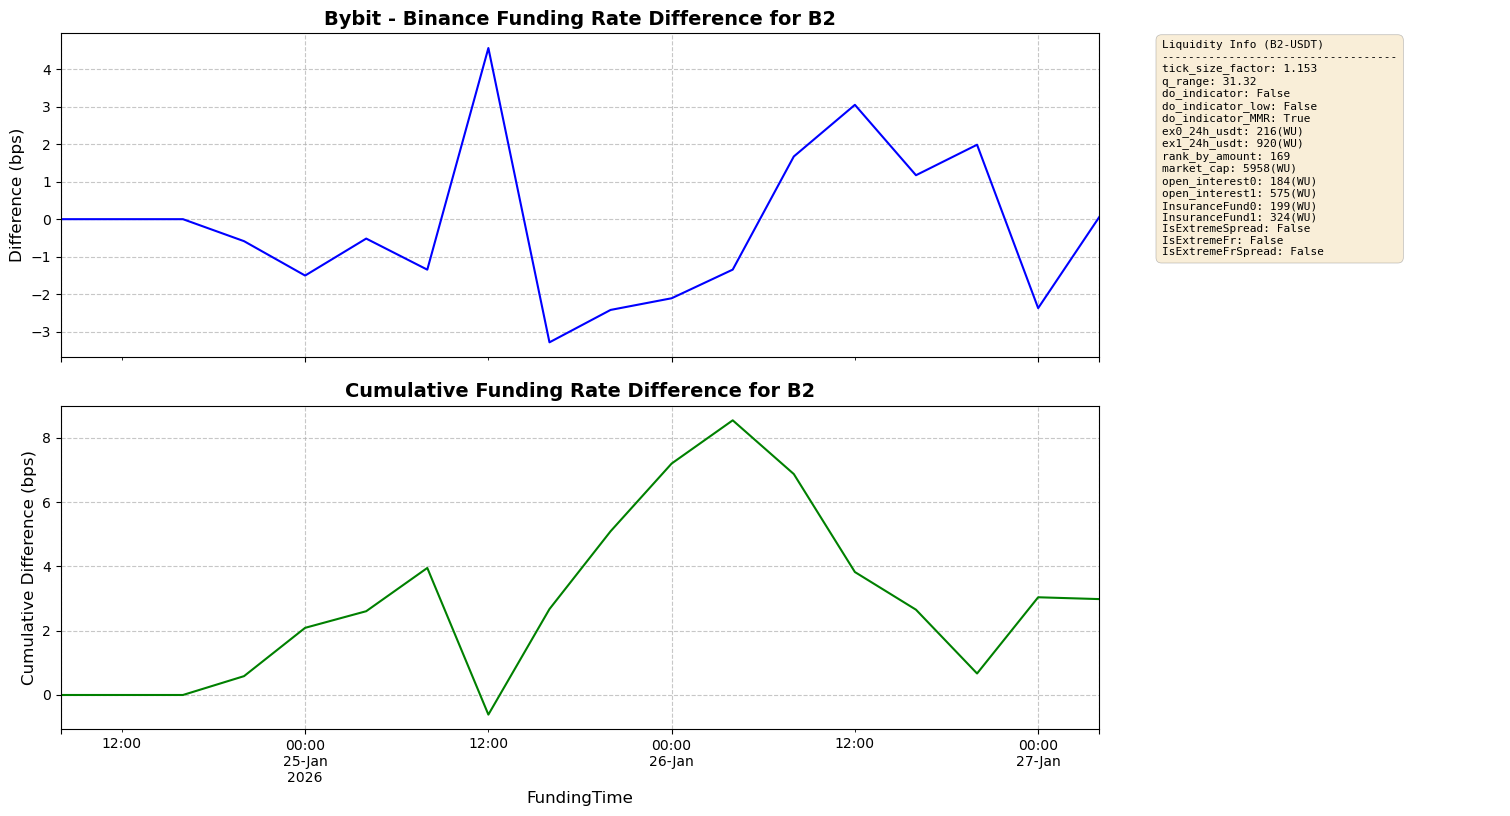

[AERO] read_data=0.915s rest=0.006s 
[Matplotlib] ✅ 成功读取 AERO 的流动性特征信息


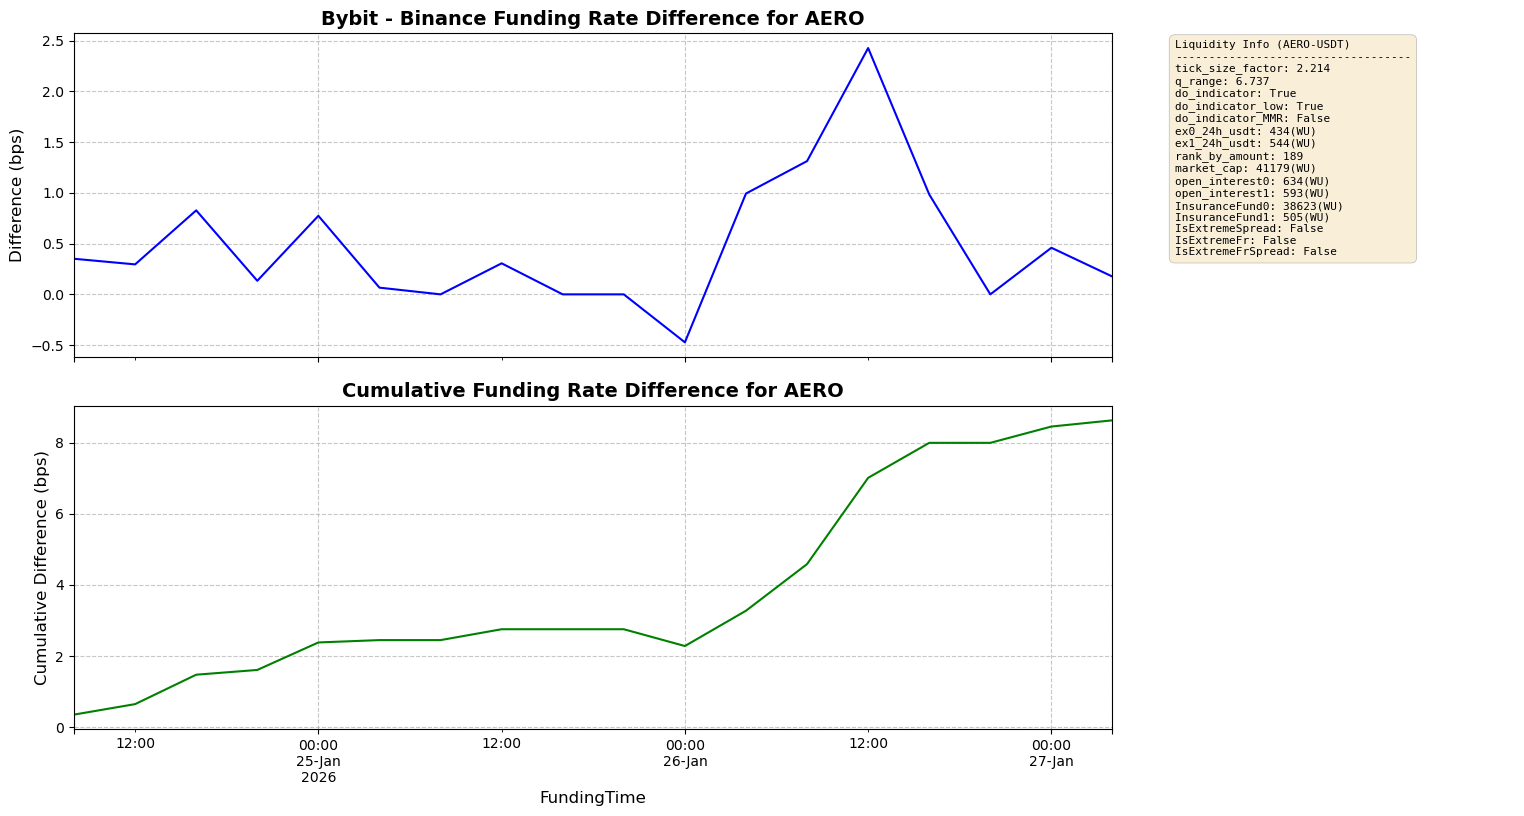

[SQD] read_data=0.692s rest=0.005s 
[Matplotlib] ✅ 成功读取 SQD 的流动性特征信息


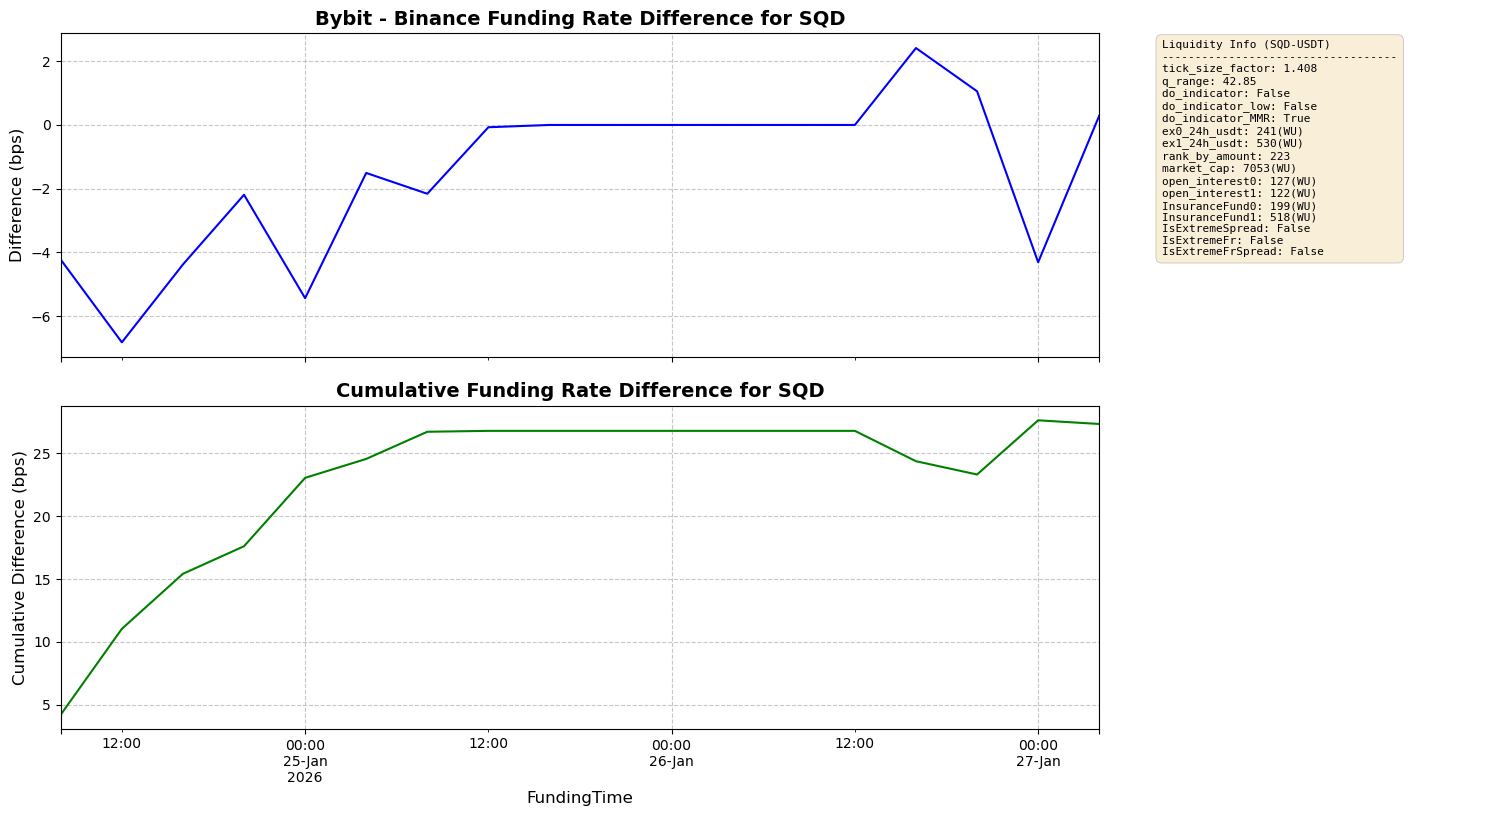

[FOGO] read_data=0.053s rest=0.003s 
[Matplotlib] ✅ 成功读取 FOGO 的流动性特征信息


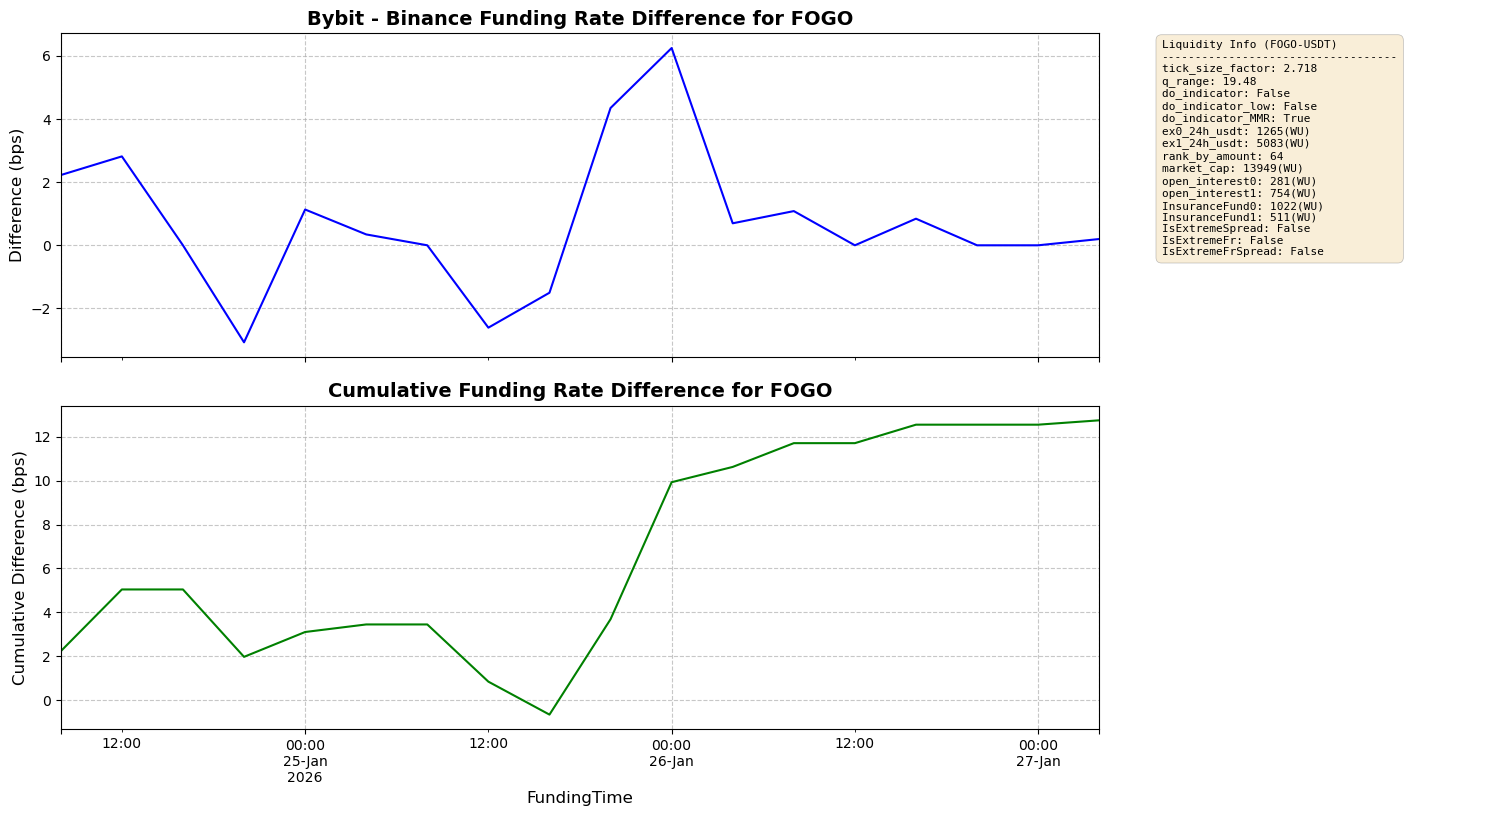

In [4]:
for symbol in ['ORDER', 'JTO', 'ID', 'TWT', 'BIGTIME', 'ASTR', 'ROSE', 'SYRUP', 'STG', 'BAT', 'POL','LYN','S','B2','AERO','SQD','FOGO']:
    results = analyze_funding_rate_diff_v2(symbol, last_time=pd.to_datetime('2026-01-27 04:15:00'), lookback_window=3, isPlotMatplotlib=True, mode = 'BN-BYBIT', features_csv_path ='/Volumes/T7/Obentech/scored_df/bn_bybit/20260127/2026012704_scored_features_swap.csv' )

[ETH] read_data=1.081s rest=0.018s 
[Matplotlib] ℹ️  未提供特征文件路径，跳过流动性信息展示


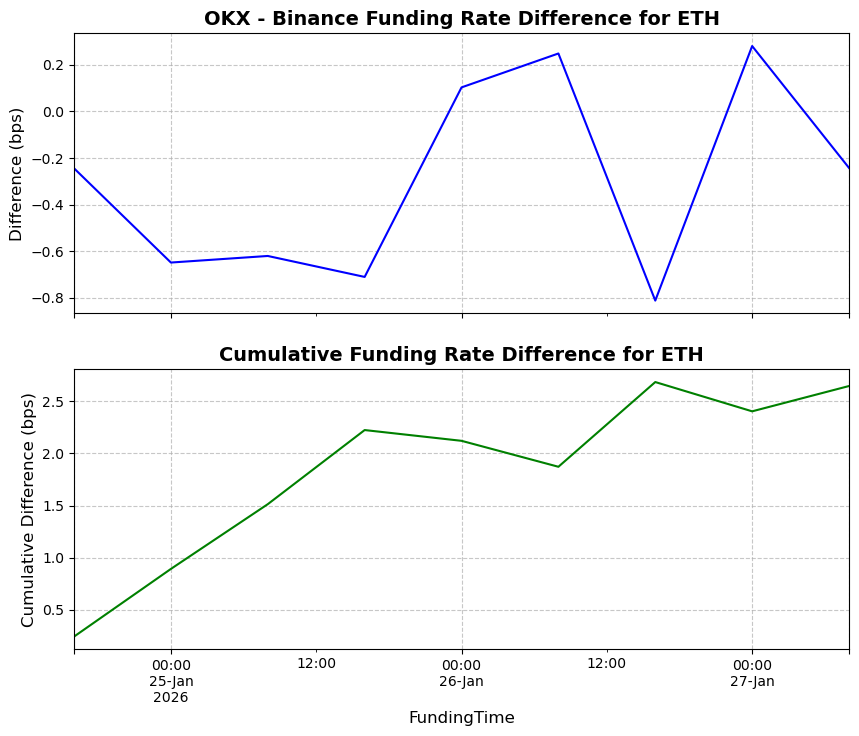

In [8]:
results = analyze_funding_rate_diff_v2(symbol='ETH', last_time=pd.to_datetime('2026-01-27 08:15:00'), lookback_window=3, isPlotMatplotlib=True, mode = 'BN-OKX', features_csv_path ='' )

In [9]:
results['funding_diff']

,FundingRate_binance,FundingRate_okx,funding_diff
FundingTime,,,
2026-01-24 16:00:00,0.000012,-0.000013,-0.000024
2026-01-25 00:00:00,0.000013,-0.000052,-0.000065
2026-01-25 08:00:00,0.000041,-0.000021,-0.000062
2026-01-25 16:00:00,0.000067,-0.000004,-0.000071
2026-01-26 00:00:00,0.000041,0.000051,0.000010
2026-01-26 08:00:00,-0.000136,-0.000111,0.000025
2026-01-26 16:00:00,0.000065,-0.000016,-0.000081
2026-01-27 00:00:00,0.000013,0.000041,0.000028
2026-01-27 08:00:00,0.000073,0.000048,-0.000024


In [6]:
results

{'symbol': 'JELLYJELLY',
 'latest_cumulative_diff': 0.00414943,
 'earn': 0.00414943,
 'earn_1day': 0.00245246,
 'earn_mean': 0.001464504705882353,
 'mode_binary_prop': 1.0,
 'mode_sign_binary': 1,
 'do_indicator': True,
 'funding_diff':                      FundingRate_binance  FundingRate_okx  funding_diff
 FundingTime                                                            
 2026-01-12 08:00:00             0.000050         0.000050      0.000000
 2026-01-12 12:00:00             0.000050         0.000050      0.000000
 2026-01-12 16:00:00             0.000050         0.000050      0.000000
 2026-01-12 20:00:00             0.000050         0.000050      0.000000
 2026-01-13 00:00:00             0.000050         0.000256      0.000206
 2026-01-13 04:00:00             0.000050         0.000050      0.000000
 2026-01-13 08:00:00             0.000050         0.000050      0.000000
 2026-01-13 12:00:00             0.000050         0.000050      0.000000
 2026-01-13 16:00:00            -0

In [17]:
results

{'symbol': 'ZEC',
 'latest_cumulative_diff': -0.0004525805826984,
 'earn': -0.0006785949891037,
 'earn_1day': -0.0006279340411141001,
 'earn_mean': -0.00025447312091388753,
 'mode_binary_prop': 0.7777777777777777,
 'mode_sign_binary': -1,
 'do_indicator': True,
 'funding_diff':                      FundingRate_binance  FundingRate_okx  funding_diff
 FundingTime                                                            
 2026-01-07 08:00:00             0.000100         0.000050     -0.000050
 2026-01-07 16:00:00             0.000100         0.000100      0.000000
 2026-01-08 00:00:00            -0.000085         0.000100      0.000185
 2026-01-08 08:00:00             0.000034         0.000100      0.000066
 2026-01-08 16:00:00             0.000100         0.000100      0.000000
 2026-01-09 00:00:00             0.000100         0.000100      0.000000
 2026-01-09 08:00:00             0.000100        -0.000202     -0.000302
 2026-01-09 16:00:00             0.000100        -0.000103     -0

[Matplotlib] ✅ 成功读取 TAO 的流动性特征信息


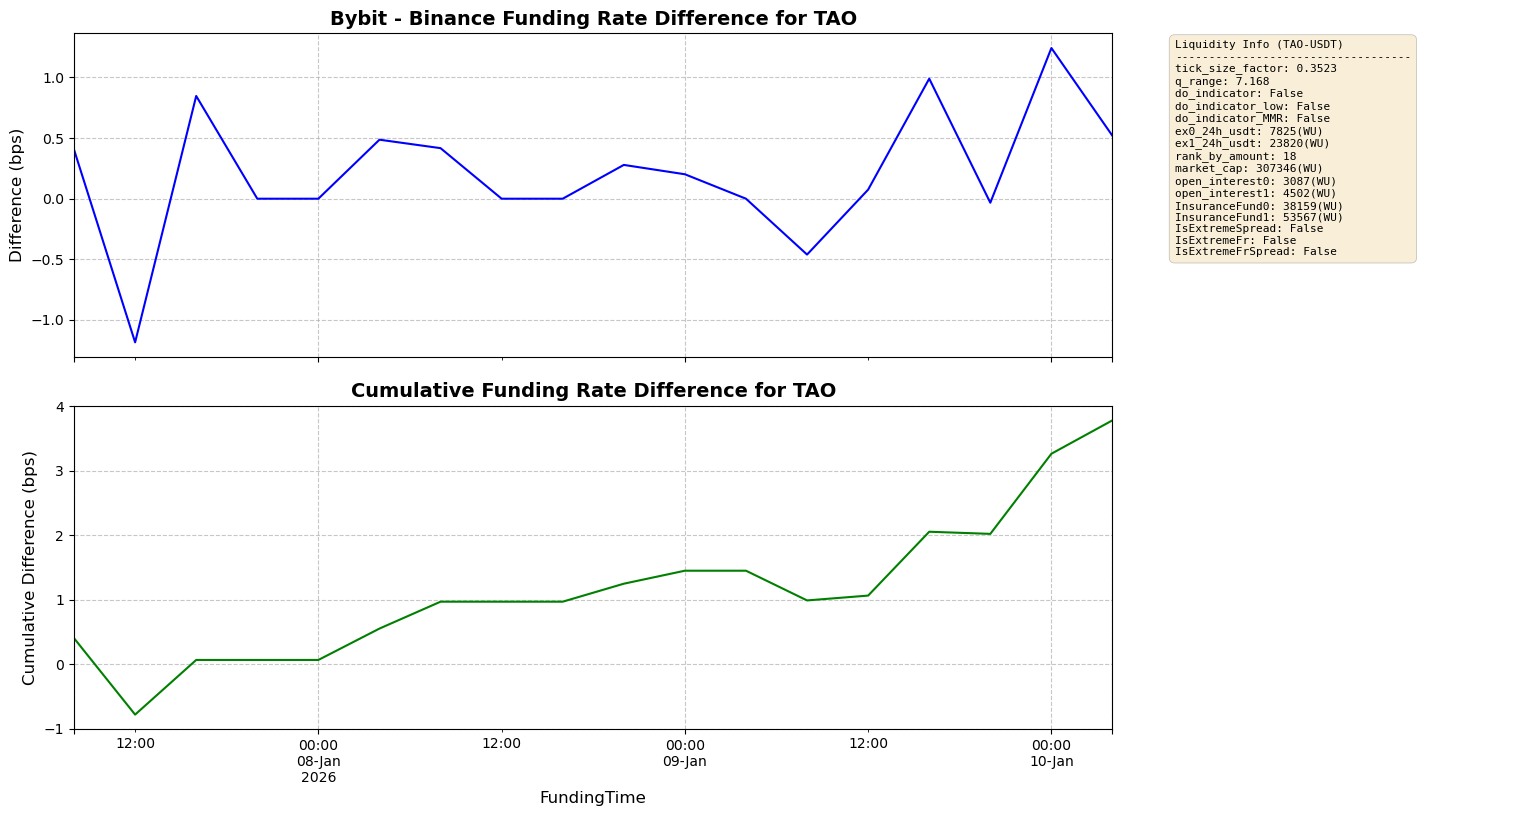

In [15]:
results = analyze_funding_rate_diff_v2(symbol='ZEC', last_time=pd.to_datetime('2026-01-10 04:15:00'), lookback_window=3, isPlotMatplotlib=True, mode = 'BN-BYBIT', features_csv_path ='/Volumes/T7/Obentech/scored_df/bn_bybit/20260109/2026010904_scored_features_swap.csv' )

In [6]:
results['funding_diff']

,FundingRate_binance,FundingRate_okx,funding_diff
FundingTime,,,
2026-01-07 05:00:00,-0.002320,-0.003166,-0.000846
2026-01-07 06:00:00,-0.002463,-0.004895,-0.002432
2026-01-07 07:00:00,-0.002913,-0.004727,-0.001814
2026-01-07 08:00:00,-0.002987,-0.003580,-0.000592
2026-01-07 09:00:00,-0.002899,-0.003409,-0.000510
...,...,...,...
2026-01-10 00:00:00,-0.000381,0.000013,0.000394
2026-01-10 01:00:00,-0.000507,0.000013,0.000519
2026-01-10 02:00:00,-0.000573,0.000013,0.000586


In [3]:
results

{'symbol': 'GMT',
 'latest_cumulative_diff': 0.02102311,
 'earn': 0.013214830000000004,
 'earn_1day': 0.012638030000000001,
 'earn_mean': 0.004404943333333335,
 'mode_binary_prop': 0.6923076923076923,
 'mode_sign_binary': 1,
 'do_indicator': False,
 'funding_diff':                      FundingRate_binance  FundingRate_okx  funding_diff
 FundingTime                                                            
 2026-01-07 08:00:00             0.000096         0.000013     -0.000084
 2026-01-07 16:00:00            -0.000067         0.000013      0.000080
 2026-01-08 00:00:00            -0.000064         0.000013      0.000076
 2026-01-08 08:00:00             0.000044         0.000013     -0.000031
 2026-01-08 16:00:00            -0.000640         0.000013      0.000652
 2026-01-09 00:00:00            -0.000435         0.000013      0.000447
 2026-01-09 08:00:00            -0.000294        -0.000220      0.000073
 2026-01-09 16:00:00            -0.002536        -0.000156      0.002380
 2026

In [2]:
import pandas as pd
pd.to_datetime(1766324099900, unit='ms')

Timestamp('2025-12-21 13:34:59.900000')

In [16]:
results

{'symbol': 'LSK',
 'latest_cumulative_diff': 0.00509033,
 'earn': 0.005090329999999997,
 'earn_1day': 0.000841810000000001,
 'earn_mean': 0.0017206749295774638,
 'mode_binary_prop': 0.8055555555555555,
 'mode_sign_binary': 1,
 'do_indicator': True,
 'funding_diff':                      FundingRate_binance  FundingRate_okx  funding_diff
 FundingTime                                                            
 2025-12-17 05:00:00             0.000013         0.000013      0.000000
 2025-12-17 06:00:00            -0.000037         0.000013      0.000050
 2025-12-17 07:00:00             0.000013         0.000159      0.000147
 2025-12-17 08:00:00            -0.000033         0.000013      0.000045
 2025-12-17 09:00:00            -0.000062         0.000013      0.000074
 ...                                  ...              ...           ...
 2025-12-20 00:00:00            -0.000381        -0.000641     -0.000259
 2025-12-20 01:00:00            -0.000347        -0.001066     -0.000719
 2025